# Homework 04: Git, Discrete Element Method, and NetworkX
# Date: 10/29/2018
# Due: 11/07/2018; 10:30 PM
## Objectives: We will have more practices on numerical methods relevant to our previous assignments.

---
### Your Name:  Boyao Zhu

---
## Problem 1

**In the pre-class of Git, you were asked to come up with a question for Git commands. I collected 10 questions from the students. They are given below.  **

**Q1:** What happens when two computers who have both made separate changes to the same file try to push their local repo to the master?


**Q2:** If two people work on the same file at the same time, how does git merge the two different versions of changes?

**Q3:**  If there are several people working together at the same time, how do they make changes to the code simultaneously.

**Q4:** What will happen if two different people having access to a repository change the same file in totally different ways and push the changes onto the master branch? What will the final version of the file in the master branch look like?

**Q5:** If there are several people working together at the same time, how do they make changes to the code simultaneously.


**Q6:** When you commit something, it seems to make it the main branch. What if you want to make some test code and push it to Git, but you don't want it to be the main branch? How do you commit and push the code without making it the main branch?


**Q7:** When using Windows for Git, should you use the SSH or HTTPS link to connect to Git. Why?

**Q8:** How to operate Git on terminal?

**Q9:** Is there an easy way to add numerous files from my local repository to GitLab repository instead of typing add, commit and push several times? Should I put all of the newly added ones into a folder and then push it to the GitLab repository for avoiding this issue? Should we first merge all the files before doing any other changes, If there are several files different on GitLab repository and your local repository?

**10:** Is there a way to change the files after adding and committing but before pushing?

**Q11:** What aspects of this system make this best for a professional setting?

**Q12:**I am wondering how to delete a project on GitLab.

**Q13:** Is there a way to see who has modified a file after running git status?

**Q14:** How do we utilize GIT to facilitate the development of complicated projects that need collaborations among multiple groups?

**Q15:** Do the changes you make in gitlab apply to your files on your local device?

**Q17:** Why should we use"git add" before "git commit"? What is the difference between them?

**Q16:** How to undo a commit ?

---
**A. ** If you see the question you provided, please give its answer.

**Answer: ** None

**B. ** Please pick the seven best quality questions, rank them from high to low quality. 

**Answer: ** Q1 Q3 Q6 Q16 Q17 Q10 Q12

**C. ** Pick three questions (the 1st, 3rd, and 7th in your list in A), answer them as well as possible.

**Answer: ** Q16
To remove the last commit from git, you can simply run git reset --hard HEAD^ If you are removing multiple commits from the top, you can run git reset --hard HEAD~2 to remove the last two commits. You can increase the number to remove even more commits.

Q17
The git add command should not be confused with svn add , which adds a file to the repository. Instead, git add works on the more abstract level of changes. This means that git add needs to be called every time you alter a file, whereas svn add only needs to be called once for each file.

Q12
Click to your repository {for example yourUsername/yourRepository for example mbaric/test }
Then in the main toolbar of github click on Settings.
Scroll to the bottom of the page to the section called Danger Zone and you will find Delete this repository button.

---
## Problem 2


** Molecular Dynamics is one type of agent based modeling. Each of the molecules is treated individually and it moves (response) according to the force exerted on it (rules).  **

**Discrete element method (DEM) can be viewed as a variation from the molecular dynamics (MD). Similar to MD, DEM uses Newton's law to calculate the acceleration and velocity of an object, and use them to project the position of the object over a time step. The main difference is that, instead of long range interaction force in MD, the force in DEM arises only when objects contact each other. **

**In this homework problem, we will develop a simple DEM code. We assume all objects are spheres.  When two spheres ($i$ and $j$) hit into each other, the overlap is defined as 
$$\delta = (r_i + r_j) - (\mathbf{x}_i - \mathbf{x}_j) \cdot \mathbf{n}_{ij} $$
where $r_i$ and $r_j$ are the radii of the two spheres, and $\mathbf{x}_i$ and $\mathbf{x}_j$ are the position vectors of the centers of the two spheres. The vector $\mathbf{x}_i - \mathbf{x}_j$ is the vector pointing from the center of $j$ to the center of $i$, and $$\mathbf{n}_{ij} = (\mathbf{x}_i - \mathbf{x}_j) / |\mathbf{x}_i - \mathbf{x}_j|$$ is the unit vector of $\mathbf{x}_i - \mathbf{x}_j$. **

**The magnitude of contact force exerted on $i$ is $$ f_{ij} = k\delta + \gamma v_n$$
where $k$ is a spring constant, $\gamma$ is damping constant, and $v_n$ is the relative velocity in the normal direction: $v_n = -(\mathbf{v}_i -\mathbf{v}_j ) \cdot \mathbf{n}_{ij}$. **
 
<img src = "DEM_2p01.png" alt=drawing width=300>
<font color=blue>Image from: Introduction to discrete element methods, European Journal of Environmental and Civil Engineering, 12:7-8, 785-826, DOI: 10.1080/19648189.2008.9693050</font>

**The acceleration of $i$ caused from collision with $j$ is $$\mathbf{a}_i = \frac{f_{ij}}{ m_i} \mathbf{n}_{ij}.$$ For a many-particle system, the net contact force will be the sum of all contact forces from all other particles: $$\mathbf{a}_i = \frac{1}{m_i} \sum^{N}_{j\neq i} f_{ij} \mathbf{n}_{ij}. $$**

**The position of $i$ after the collision over a time step $\Delta t$ will be $$\mathbf{x}_i^{n+1}  = 2 \mathbf{x}_i^{n} - \mathbf{x}_i^{n-1} + \frac{\mathbf{a}_i}{2}  \Delta t^2  ,  $$ and the velocity will be $$ \mathbf{v}_i^{n+1} = \mathbf{v}_i^{n} +  \mathbf{a}_i \Delta t .$$**




**The domain is given as illustrated. Fifteen randomly sized spheres are placed in the 2D box. **
<img src = "DEM_domain.png" alt=drawing width=300>

In [1]:
# load libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt

import matplotlib.cm as cm

from IPython.display import display, clear_output

import time 



In [2]:
# plot DEM spheres

def plot_DEM_2D(tm, X_lb, X_ub, Y_lb, Y_ub, X_crt, Y_crt, radii, colors):

    clear_output(wait=True)
    plt.figure(figsize=(8, 12))
    
    ax = plt.gca()

    for x, y, rd, clr  in zip(X_crt, Y_crt, radii, colors):

        circle = plt.Circle((x, y), rd, color=clr, fill=False)
        ax.add_artist(circle)

    plt.ylim(Y_lb-1, Y_ub+1)
    plt.xlim(X_lb-1, X_ub+1)
    plt.title(tm)
    plt.show()
    time.sleep(0.01)

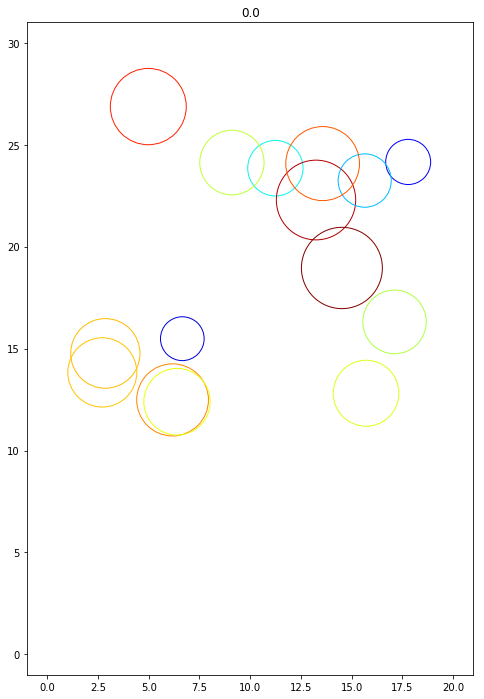

In [3]:
# initial configuration

nop = 15  # <== number of particles

X_lb = 0.0   # <== lower bound of X coordinate
X_ub = 20.0  # <== upper bound of X coordinate

Y_lb = 0.0   # <== lower bound of Y coordinate
Y_ub = 30.0  # <== upper bound of Y coordinate

radii = np.zeros(nop)
ca = np.zeros(nop)

X_crt = np.zeros(nop)
Y_crt = np.zeros(nop)

for n in range(nop):
    ca[n] = random.random() 
    
    X_crt[n] = 16*random.random() + 2.0    # <== particle position in X
    Y_crt[n] = 16*random.random() + 12.0   # <== particle position in Y


radii[0:nop] = 1*ca[0:nop] + 1.0   # <== particle radii


colors = [cm.jet(color) for color in ca]  # <== create color of particles

tm = 0.0

# plot
plot_DEM_2D(tm, X_lb, X_ub, Y_lb, Y_ub, X_crt, Y_crt, radii, colors)

In [4]:
# create the arrays that will be used in the simulation

Dst = np.zeros((nop,nop+4))    # <== distance to other particles and to the 4 walls
Ovp = np.zeros((nop,nop+4))    # <== overlap to other particles and to the 4 walls

Vct_X = np.zeros((nop,nop+4))  # <== relative position vector to other particles and to the walls ( in X)
Vct_Y = np.zeros((nop,nop+4))  # <== relative position vector to other particles and to the walls ( in Y)

uV_X = np.zeros((nop,nop+4))   # unit vector of Vct_X
uV_Y = np.zeros((nop,nop+4))   # unit vector of Vct_Y

Vel_X = np.zeros(nop)          # velocity particles in X
Vel_Y = np.zeros(nop)          # velocity particles in Y
 
reV_X = np.zeros((nop,nop+4))  # relative velcity to other particles and to the walls (in X)
reV_Y = np.zeros((nop,nop+4))  # relative velcity to other particles and to the walls (in Y)

Acc_X = np.zeros(nop)          # acceleration in X
Acc_Y = np.zeros(nop)          # acceleration in X

ctF = np.zeros((nop,nop+4))    # magnitude of contact forec from other particles and from the walls

Mss = np.zeros(nop)            # particle mass

pi = math.acos(-1.0)
Mss[:] = radii[:]**2*pi

** The main code starts in the cell below. Fill the blanks and make the code work. The information needed can be found in the description of DEM in the beginning og this problem. **

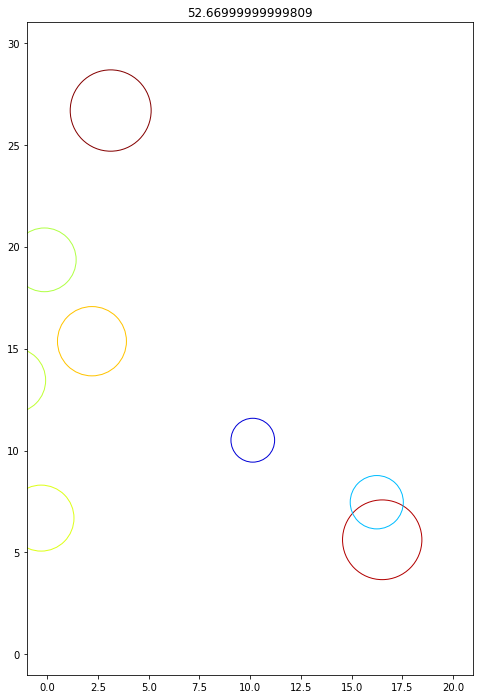

In [6]:
# simulation parameters
Kcst_p = 10.0   # <== spring constant when colliding to other particles
Kcst_w = 50.0   # <== spring constant when colliding to walls
gamma_p = 0.1   # <== damping constant when colliding to other particles
gamma_w = 0.5   # <== damping constant when colliding to walls
grvt = -0.1     # <== gravitational acceleration
dt = 0.01       # time step size


# positions at the next (future) time step
X_ftr = np.zeros(nop)
Y_ftr = np.zeros(nop)

# positions at the previuos time step
X_prv = np.zeros(nop)
Y_prv = np.zeros(nop)

X_prv[0:nop] = X_crt[0:nop]
Y_prv[0:nop] = Y_crt[0:nop]


# unit relative position to the 4 walls
uV_X[:,nop+0] =  1.0  # to the west wall in X
uV_X[:,nop+1] = -1.0  # to the east wall in X
uV_Y[:,nop+2] =  1.0  # to the south wall in Y
uV_Y[:,nop+3] = -1.0  # to the north wall in Y 

# ############################################################
# Up to here, you may notice that all quantities relative to
# the 4 walls are stored in the columns from nop+0 to nop+3.
# For example, for particle p, the relative positions to particles 0, through nop-1
# are stored in Vct_X[p,0:nop] and Vct_Y[p:nop]. 
# To the west wall, it is Vct_X[p,nop+0] and Vct_Y[p,nop+0].
# To the east wall, it is Vct_X[p,nop+1] and Vct_Y[p,nop+1]. So on and so forth.
# ############################################################


# time evolution
for iter in range(2001):
# for iter in range(1):
    
    # calculate the relative positions, distance, and overlaps against other particles
    for p in range(nop):
        for q in range(nop):
            
            if p != q :
                Vct_X[p,q] = X_crt[p] - X_crt[q]   # <== fill the blank
                Vct_Y[p,q] = Y_crt[p] - Y_crt[q]    # <== fill the blank
            
                Dst[p,q] = math.sqrt(Vct_X[p,q]**2 + Vct_Y[p,q]**2)
            
                uV_X[p,q] = Vct_X[p,q] / Dst[p,q]   # <== fill the blank
                uV_Y[p,q] = Vct_Y[p,q] / Dst[p,q]   # <== fill the blank
            
                Ovp[p,q] = (radii[p]+radii[q])-(Vct_X[p,q]+Vct_Y[p,q])*(uV_X[p,q]+uV_Y[p,q])  # <== fill the blank
                
                #reV_X[p,q] = uV_X[p,q] * (Vct_X[p,q]+Vct_Y[p,q])/Dst[p,q]  # <== fill the blank
                #reV_Y[p,q] = uV_Y[p,q] * (Vct_X[p,q]+Vct_Y[p,q])/Dst[p,q]  # <== fill the blank
                reV_X[p,q] = -(Vel_X[p] - Vel_X[q])*uV_X[p,q]
                reV_Y[p,q] = -(Vel_Y[p] - Vel_Y[q])*uV_X[p,q]
        
        # against West wall (X_lb)
        Vct_X[p,nop+0] = X_crt[p] - 0                       # <== fill the blank
        Dst[p,nop+0] = math.sqrt(Vct_X[p,nop+0]**2)
        Ovp[p,nop+0] = radii[p] - Vct_X[p,nop+0]*uV_X[p,nop+0]  # <== fill the blank
        reV_X[p,nop+0] = -Vel_X[p]*uV_X[p,nop+0]                          # <== fill the blank
        
        # against East wall (X_ub)
        Vct_X[p,nop+1] = X_crt[p] -20                        # <== fill the blank
        Dst[p,nop+1] = math.sqrt(Vct_X[p,nop+1]**2)           
        Ovp[p,nop+1] = radii[p] - Vct_X[p,nop+1]*uV_X[p,nop+1]  # <== fill the blank
        reV_X[p,nop+1] = -Vel_X[p]*uV_X[p,nop+1]                        # <== fill the blank
        
        # against South wall (Y_lb)
        Vct_Y[p,nop+2] = Y_crt[p] -0                        # <== fill the blank
        Dst[p,nop+2] = math.sqrt(Vct_Y[p,nop+2]**2)
        Ovp[p,nop+2] = radii[p] - Vct_Y[p,nop+2]*uV_Y[p,nop+2]  # <== fill the blank
        reV_Y[p,nop+2] = -Vel_Y[p]*uV_Y[p,nop+2]                       # <== fill the blank
         
        # against North wall (Y_ub)
        Vct_Y[p,nop+3] = Y_crt[p] -30                        # <== fill the blank
        Dst[p,nop+3] = math.sqrt(Vct_Y[p,nop+3]**2)
        Ovp[p,nop+3] = radii[p] - Vct_Y[p,nop+3]*uV_Y[p,nop+3]  # <== fill the blank
        reV_Y[p,nop+3] = -Vel_Y[p]*uV_Y[p,nop+3]                         # <== fill the blank
    
    
    

    # calculate the contact force exerted from other particles
    for p in range(nop):
        for q in range(nop):
            if Ovp[p,q] > 0.0:
                ctF[p,q] = Kcst_p*Ovp[p,q] - gamma_p*(reV_X[p,q]*uV_X[p,q]+reV_Y[p,q]*uV_Y[p,q])
            else:
                ctF[p,q] = 0.0
    
    # calculate the contact force exerted from the walls
    for p in range(nop):
        for q in range(nop,nop+4):
            if Ovp[p,q] > 0.0:
                ctF[p,q] = Kcst_w*Ovp[p,q] - gamma_w*(reV_X[p,q]*uV_X[p,q]+reV_Y[p,q]*uV_Y[p,q])
            else:
                ctF[p,q] = 0.0
    
    # calculate the acceleration of each particle and update its position
    for p in range(nop):
        Acc_X[p] = np.sum(ctF[p,:]*uV_X[p,:])/Mss[p]         # <== fill the blank
        Acc_Y[p] = np.sum(ctF[p,:]*uV_Y[p,:])/Mss[p] + grvt  # <== fill the blank
        
        X_ftr[p] = 2*X_crt[p]-X_prv[p]+Acc_X[p]/2*dt**2   # <== fill the blank
        Y_ftr[p] = 2*Y_crt[p]-Y_prv[p]+Acc_Y[p]/2*dt**2   # <== fill the blank
        
        # update the velocity of each particle
        Vel_X[p] = Vel_X[p] + Acc_X[p]*dt  # <== fill the blank
        Vel_Y[p] = Vel_Y[p] + Acc_Y[p]*dt  # <== fill the blank
       
    
    X_prv[0:nop] = X_crt[0:nop]
    Y_prv[0:nop] = Y_crt[0:nop]
    
    X_crt[0:nop] = X_ftr[0:nop]
    Y_crt[0:nop] = Y_ftr[0:nop]
    
    tm = tm + dt
    
    if iter%20 == 0:
        plot_DEM_2D(tm, X_lb, X_ub, Y_lb, Y_ub, X_crt, Y_crt, radii, colors)

---
## Problem 3:


**We want to use Dijkstra's algorimth to find the shortest path in a graph. **

Let's watch the video below.

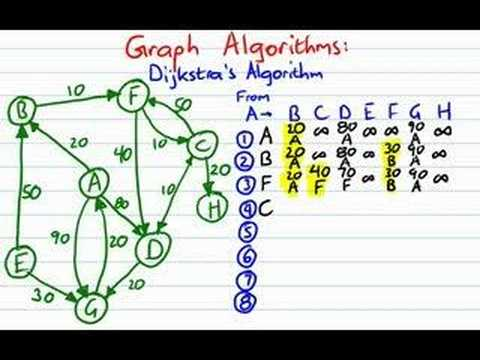

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo("8Ls1RqHCOPw",width=640,height=360)

### 3.1: Use networkX to make a graph object. You can set the positions of the vertices to make the graph looks similar to that in the video.
Note that there are multiple paths between some vertices. You may want to use nx.MultiDiGraph( ) function. You can set the value for "label_pos" in "draw_networkx_edge_labels" to show the two weights of the two paths when there are two paths between two vertices.

{1: Text(0,1,'$E$'),
 2: Text(0,4,'$B$'),
 3: Text(2,0,'$G$'),
 4: Text(2,2,'$A$'),
 5: Text(4,1,'$D$'),
 6: Text(4,4,'$F$'),
 7: Text(5,3,'$C$'),
 8: Text(6,2,'$H$')}

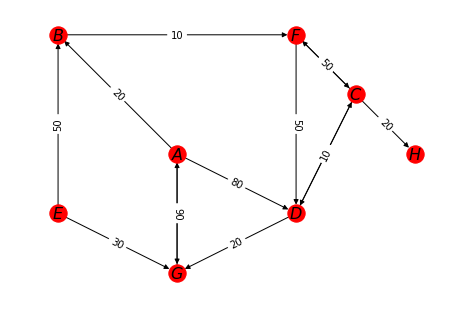

In [4]:
# Your code:
import networkx as nx

F=nx.DiGraph()

F.add_node(1, pos=(0,1))
F.add_node(2, pos=(0,4))
F.add_node(3, pos=(2,0))
F.add_node(4, pos=(2,2))
F.add_node(5, pos=(4,1))
F.add_node(6, pos=(4,4))
F.add_node(7, pos=(5,3))
F.add_node(8, pos=(6,2))

F.add_edge(1,2, weight=50)
F.add_edge(1,3, weight=30)
F.add_edge(3,4, weight=20)
F.add_edge(4,3, weight=90)
F.add_edge(2,6, weight=10)
F.add_edge(6,5, weight=50)
F.add_edge(4,2, weight=20)
F.add_edge(4,5, weight=80)
F.add_edge(6,7, weight=10)
F.add_edge(7,6, weight=50)
F.add_edge(5,7, weight=10)
F.add_edge(7,5, weight=10)
F.add_edge(7,8, weight=20)
F.add_edge(5,3, weight=20)


pos = nx.get_node_attributes(F, 'pos')
label = {}
label[1]="$E$"
label[2]="$B$"
label[3]="$G$"
label[4]="$A$"
label[5]="$D$"
label[6]="$F$"
label[7]="$C$"
label[8]="$H$"

nx.draw(F, pos)

labels = nx.get_edge_attributes(F, 'weight')
nx.draw_networkx_edge_labels(F, pos, edge_labels=labels)
nx.draw_networkx_labels(F, pos, label, font_size=16)

### 3.2: Find the shorest path from A to H. If you want to challenge yourself, you can write the algorithm by yourself. Or, you can find the function for dijkstra in networkX and use the existing function.

In [9]:
# Your code:
import sys
import heapq

class Node:

    def __init__(self, name):
        self.name = name
        self.visited = False
        self.adjacenciesList = []
        self.predecessor = None
        self.mindistance = sys.maxsize    

    def __lt__(self, other):
        return self.mindistance < other.mindistance

class Edge:

    def __init__(self, weight, startvertex, endvertex):
        self.weight = weight
        self.startvertex = startvertex
        self.endvertex = endvertex

def calculateshortestpath(vertexlist, startvertex):
    q = []
    startvertex.mindistance = 0
    heapq.heappush(q, startvertex)

    while q:
        actualnode = heapq.heappop(q)
        for edge in actualnode.adjacenciesList:
            tempdist = edge.startvertex.mindistance + edge.weight
            if tempdist < edge.endvertex.mindistance:
                edge.endvertex.mindistance = tempdist
                edge.endvertex.predecessor = edge.startvertex
                heapq.heappush(q,edge.endvertex)
def getshortestpath(targetvertex):
    print("The value of it's minimum distance is: ",targetvertex.mindistance)
    node = targetvertex
    while node:
        print(node.name)
        node = node.predecessor

node1 = Node("A");
node2 = Node("B");
node3 = Node("C");
node4 = Node("D");
node5 = Node("E");
node6 = Node("F");
node7 = Node("G");
node8 = Node("H");

edge1 = Edge(20,node1,node2);
edge2 = Edge(80,node1,node4);
edge3 = Edge(90,node1,node7);
edge4 = Edge(10,node2,node6);
edge5 = Edge(50,node3,node5);
edge6 = Edge(20,node3,node8);
edge7 = Edge(20,node4,node7);
edge8 = Edge(50,node5,node2);
edge9 = Edge(30,node5,node7);
edge10 = Edge(40,node6,node4);
edge11 = Edge(10,node6,node3);
edge12 = Edge(20,node7,node1);
edge13 = Edge(10,node3,node4);
edge14 = Edge(10,node4,node3);


node1.adjacenciesList.append(edge1);
node1.adjacenciesList.append(edge2);
node1.adjacenciesList.append(edge3);
node2.adjacenciesList.append(edge4);
node3.adjacenciesList.append(edge5);
node3.adjacenciesList.append(edge6);
node4.adjacenciesList.append(edge7);
node5.adjacenciesList.append(edge8);
node5.adjacenciesList.append(edge9);
node6.adjacenciesList.append(edge10);
node6.adjacenciesList.append(edge11);
node7.adjacenciesList.append(edge12);
node3.adjacenciesList.append(edge13);
node4.adjacenciesList.append(edge14);

vertexlist = (node1,node2,node3,node4,node5,node6,node7,node8)

calculateshortestpath(vertexlist,node1)
getshortestpath(node8)


The value of it's minimum distance is:  60
H
C
F
B
A


---
### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assignments > Homework 04".